In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from os import path as osp
%matplotlib inline

In [2]:
sns.set()

In [3]:
baseline_dir = '../contrastive_vm/contrastive'
candidate_dir = '../contrastive_triplet_vm2/contrastive_triplet'

# Does using embedding regularizer provide better MAPR?

Baseline MAP@R: [0.253, 0.262]

ContrastiveTriplet MAP@R: [0.253, 0.261] 

# Does using embedding reg provide faster bayesian optimization?

Baseline:

Candidate:

# Does using embedding regularizer provide better convergence?
## It doesnt

In [14]:
rnum = 0

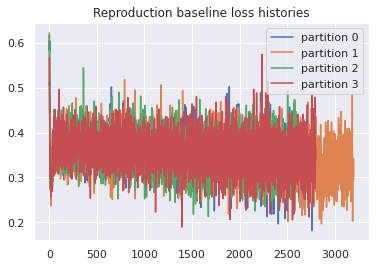

In [15]:
def get_reproduction_dirs(root):
    return [fname for fname in os.listdir(root) if 'reproduction' in fname]

def get_repr_csvs(root, csv_name):
    dfs = []
    for repr_dir in get_reproduction_dirs(root):
        repr_path = osp.join(root, repr_dir)

        repr_dfs = []
        for partition in range(0, 4):
            part_path = osp.join(repr_path, f'Test50_50_Partitions4_{partition}')

            df = pd.read_csv(osp.join(part_path, 'saved_csvs', csv_name))
            repr_dfs.append(df)
        dfs.append(repr_dfs)
    return dfs

def get_repr_loss_histories(root):
    return get_repr_csvs(root, 'loss_histories.csv')

loss_hists = get_repr_loss_histories(baseline_dir)[rnum]

plt.figure()
for i, df in enumerate(loss_hists):
    sns.lineplot(data=df['total_loss'], label=f'partition {i}')
plt.legend()
plt.title('Reproduction baseline loss histories')
plt.show()

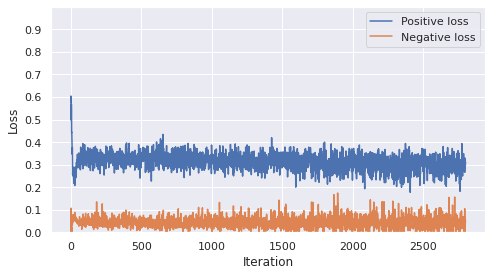

In [38]:
neg_loss_csv = 'metric_loss_ContrastiveLoss_reducer_MultipleReducers_reducers_ModuleDict_neg_loss_AvgNonZeroReducer.csv'
pos_loss_csv = 'metric_loss_ContrastiveLoss_reducer_MultipleReducers_reducers_ModuleDict_pos_loss_AvgNonZeroReducer.csv'

dfs_neg_loss = get_repr_csvs(baseline_dir, neg_loss_csv)[rnum]
dfs_pos_loss = get_repr_csvs(baseline_dir, pos_loss_csv)[rnum]

plt.figure(figsize=(7,4))
for i, df in enumerate(dfs_pos_loss):
    sns.lineplot(data=df['pos_loss'], label=f'Positive loss')
    sns.lineplot(data=dfs_neg_loss[i]['neg_loss'], label=f'Negative loss')
    break
plt.legend(loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.tight_layout()
plt.show()

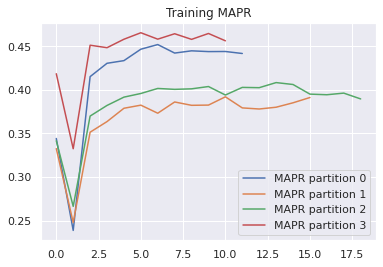

In [6]:
accuracies_val = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_VAL.csv'
accuracies_dfs = get_repr_csvs(baseline_dir, accuracies_val)

plt.figure()
for i, df in enumerate(accuracies_dfs):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Training MAPR')
plt.show()

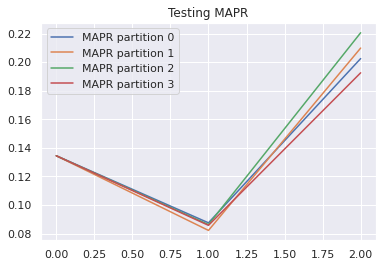

In [7]:
accuracies_test = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_TEST.csv'
accuracies_dfs = get_repr_csvs(baseline_dir, accuracies_test)

plt.figure()
for i, df in enumerate(accuracies_dfs):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Testing MAPR')
plt.show()

Candidate

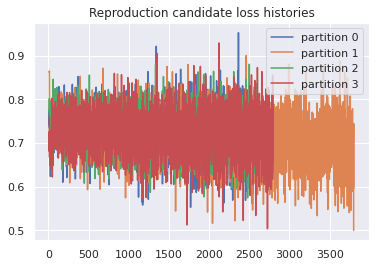

In [8]:
loss_hists = get_repr_loss_histories(candidate_dir)

plt.figure()
for i, df in enumerate(loss_hists):
    sns.lineplot(data=df['total_loss'].iloc[10:], label=f'partition {i}')
plt.legend()
plt.title('Reproduction candidate loss histories')
plt.show()

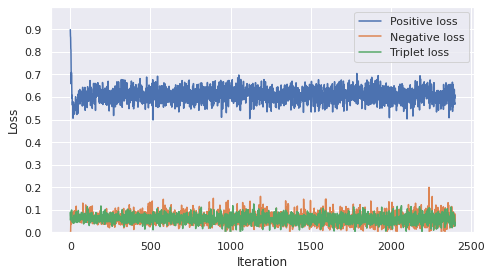

In [39]:
candidate_csv = 'metric_loss_ContrastiveTripletLoss_reducer_MultipleReducers_reducers_ModuleDict_neg_loss_AvgNonZeroReducer.csv'

dfs_neg_loss = get_repr_csvs(candidate_dir, candidate_csv)[rnum]

candidate_csv = 'metric_loss_ContrastiveTripletLoss_reducer_MultipleReducers_reducers_ModuleDict_pos_loss_AvgNonZeroReducer.csv'

dfs_pos_loss = get_repr_csvs(candidate_dir, candidate_csv)[rnum]


candidate_csv = 'metric_loss_ContrastiveTripletLoss_reducer_MultipleReducers_reducers_ModuleDict_triplet_loss_AvgNonZeroReducer.csv'

dfs_triplet_loss = get_repr_csvs(candidate_dir, candidate_csv)[rnum]

plt.figure(figsize=(7,4))
for i, df in enumerate(dfs_pos_loss):
    sns.lineplot(data=df['pos_loss'], label=f'Positive loss')
    sns.lineplot(data=dfs_neg_loss[i]['neg_loss'], label=f'Negative loss')
    sns.lineplot(data=dfs_triplet_loss[i]['triplet_loss'], label=f'Triplet loss')
    break
plt.legend(loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.tight_layout()
plt.show()


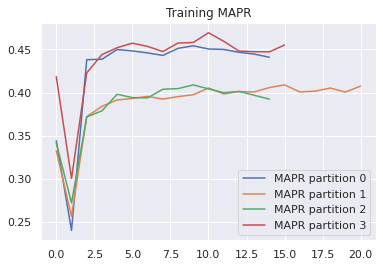

In [10]:
accuracies_val = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_VAL.csv'
accuracies_dfs = get_repr_csvs(candidate_dir, accuracies_val)

plt.figure()
for i, df in enumerate(accuracies_dfs):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Training MAPR')
plt.show()

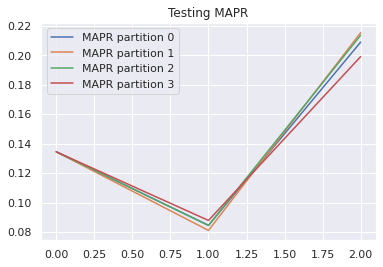

In [11]:
accuracies_test = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_TEST.csv'
accuracies_dfs = get_repr_csvs(candidate_dir, accuracies_test)

plt.figure()
for i, df in enumerate(accuracies_dfs):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Testing MAPR')
plt.show()